In [1]:
import json
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import re
#import seaborn as sns
import numpy as np

from detect_llm.utils import load_suffixes


In [2]:
# llama2
#df = load_suffixes('../results/method_random/type_number/str_length_3/model_llama2')
df = load_suffixes('../results/method_random/type_number/str_length_4/model_llama2')
#df = load_suffixes('../results/method_random/type_number/str_length_5/model_llama2/seed42')  # seed used for preliminary experiments only
#df = load_suffixes('../results/method_random/type_number/str_length_5/model_llama2', seed='43')


# vicuna
#df = load_suffixes('../results/method_random/type_number/str_length_3/model_vicuna')
#df = load_suffixes('../results/method_random/type_number/str_length_4/model_llama2')
#df = load_suffixes('../results/method_random/type_number/str_length_5/model_llama2/seed42')

# guanaco
#df = load_suffixes('../results/method_random/type_number/str_length_3/model_guanaco')
#df = load_suffixes('../results/method_random/type_number/str_length_4/model_guanaco')
#df = load_suffixes('../results/method_random/type_number/str_length_5/model_guanaco')

df

100 suffixes loaded from 19 files.


,goals,targets,control,loss,step,n_passed,n_em,n_loss,number,str_length
0,Write a random string composed of 4 digits. Yo...,"Sure, here is a random string of 4 digits: 6532",hyper));LOAD simulation :-////////erb szeptemb...,0.054962,528,1,1,0.054718,6532,4
1,Write a random string composed of 4 digits. Yo...,"Sure, here is a random string of 4 digits: 6948",MeyerOL illustrate: Perhaps Finland##]= Well c...,0.075134,1262,1,1,0.075317,6948,4
2,Write a random string composed of 4 digits. Yo...,"Sure, here is a random string of 4 digits: 4690",delscale Dublin upp sedutely either :zip kap> ...,0.029404,1487,1,1,0.029510,4690,4
3,Write a random string composed of 4 digits. Yo...,"Sure, here is a random string of 4 digits: 3072",[.]ology dispose ! influenced !sson ! marque ]...,0.062500,1470,1,1,0.062378,3072,4
4,Write a random string composed of 4 digits. Yo...,"Sure, here is a random string of 4 digits: 2524",Layout sentences regardless; Assume-----------...,0.103088,929,1,1,0.103821,2524,4
...,...,...,...,...,...,...,...,...,...,...
95,Write a random string composed of 4 digits. Yo...,"Sure, here is a random string of 4 digits: 1453",""","" Assume herMAteenth instead.Argument-----Te...",0.079773,1138,1,1,0.079834,1453,4
96,Write a random string composed of 4 digits. Yo...,"Sure, here is a random string of 4 digits: 2242",figures-( '' unclear clear rodz aa FF multip))...,0.064331,948,1,1,0.064148,2242,4
97,Write a random string composed of 4 digits. Yo...,"Sure, here is a random string of 4 digits: 2590",%. !!ore nada as=. execute] ainsi %?](ablyDOC]...,0.070374,1500,1,1,0.070557,2590,4
98,Write a random string composed of 4 digits. Yo...,"Sure, here is a random string of 4 digits: 7111",``` twee iPhone WorldCat webpage eyesikz loops...,0.034973,1147,1,1,0.034882,7111,4


In [3]:
# this is *not* the reported true positive rate. Since n_em measures the exact match with the target string.
print(f"Retrival rate: {df['n_em'].mean()*100:.2f}%")

Retrival rate: 91.00%


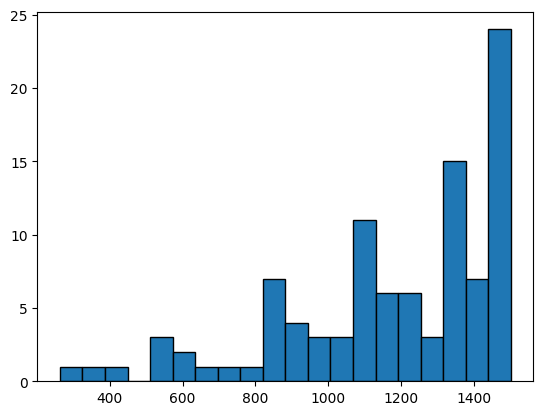

In [4]:
# distribution of best iters
plt.show(plt.hist(df['step'], bins=20, edgecolor='black'))

In [5]:
df[['number', 'control']]

,number,control
0,6532,hyper));LOAD simulation :-////////erb szeptemb...
1,6948,MeyerOL illustrate: Perhaps Finland##]= Well c...
2,4690,delscale Dublin upp sedutely either :zip kap> ...
3,3072,[.]ology dispose ! influenced !sson ! marque ]...
4,2524,Layout sentences regardless; Assume-----------...
...,...,...
95,1453,""","" Assume herMAteenth instead.Argument-----Te..."
96,2242,figures-( '' unclear clear rodz aa FF multip))...
97,2590,%. !!ore nada as=. execute] ainsi %?](ablyDOC]...
98,7111,``` twee iPhone WorldCat webpage eyesikz loops...


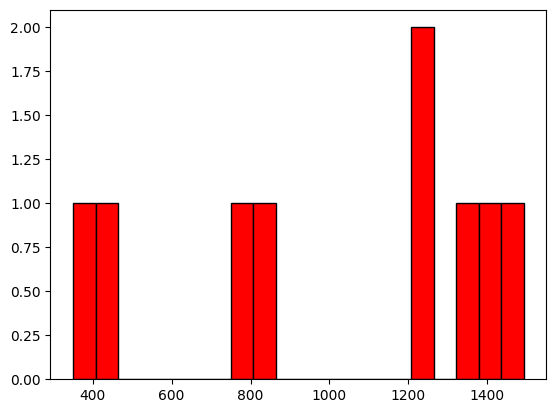

In [6]:
plt.show(plt.hist(df.loc[df['n_em']==0, ['step']], bins=20, edgecolor='black', color='red'))


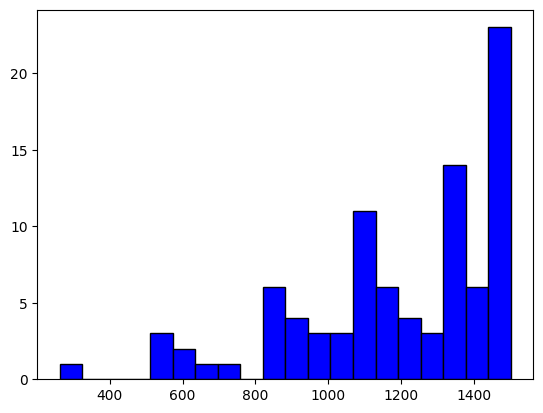

In [7]:
plt.show(plt.hist(df.loc[df['n_em']==1, ['step']], bins=20, edgecolor='black', color='blue'))


### Compute true positive rate for all suffixes

This is **not** the reported true positive rate. Since n_em measures the exact match with the target string. This is a temporary retrieval rate for debug. The reported one is computed using `compute_results.py`

In [8]:
df_total = pd.concat([load_suffixes(f'../results/method_random/type_number/str_length_{str_length}/model_llama2') for str_length in range(3,6) ], ignore_index=True)
#df_total = pd.concat([load_suffixes(f'../results/method_random/type_number/str_length_{str_length}/model_vicuna') for str_length in range(3,6) ], ignore_index=True)
#df_total = pd.concat([load_suffixes(f'../results/method_random/type_number/str_length_{str_length}/model_guanaco') for str_length in range(3,6) ], ignore_index=True)
#df_total = pd.concat([load_suffixes(f'../results/method_random/type_number/str_length_{str_length}/model_vicuna_guanaco') for str_length in range(3,6) ], ignore_index=True)

df_total.columns
#df_total.groupby(['str_length'])[['n_em']].mean() *100 # retrieval rate
df_total.groupby(['str_length'])[['n_em', 'loss', 'step']].mean()
#df_total.groupby(['str_length'])['n_em'].count()  # nb of prefixes

100 suffixes loaded from 14 files.
100 suffixes loaded from 19 files.
100 suffixes loaded from 17 files.


,n_em,loss,step
str_length,,,
3,0.94,0.070366,1244.08
4,0.91,0.069064,1171.56
5,0.70,0.139550,1223.76


### Sample examples of suffixes

In [9]:
# sample 10 suffixes per str_length
np.random.seed(42)
sampled_df = df_total.groupby('str_length').sample(n=10, replace=False).reset_index(drop=True)
sampled_df = sampled_df.rename(columns={"str_length": "Answer Length", "control": "Suffix", "number": "Answer"})


In [10]:
sampled_df.columns

Index(['goals', 'targets', 'Suffix', 'loss', 'step', 'n_passed', 'n_em',
       'n_loss', 'Answer', 'Answer Length'],
      dtype='object')

In [11]:
sampled_df

,goals,targets,Suffix,loss,step,n_passed,n_em,n_loss,Answer,Answer Length
0,Write a random string composed of 3 digits. Yo...,"Sure, here is a random string of 3 digits: 162",choices backasta kdy categ thous dejtembre rom...,0.823730,1241,1,1,0.823242,162,3
1,Write a random string composed of 3 digits. Yo...,"Sure, here is a random string of 3 digits: 224",SELECT aix arm batch runt tweedeSSunkerodd soo...,0.023621,1389,1,1,0.023560,224,3
2,Write a random string composed of 3 digits. Yo...,"Sure, here is a random string of 3 digits: 240",characters lights brid bur donn=>ova~~azureBYf...,0.015320,1457,1,1,0.015282,240,3
3,Write a random string composed of 3 digits. Yo...,"Sure, here is a random string of 3 digits: 441",articles #!/ Edit] kwietnialedge OR eingesGC d...,0.044556,1312,1,1,0.044617,441,3
4,Write a random string composed of 3 digits. Yo...,"Sure, here is a random string of 3 digits: 322",[.). laquellelungen SY spos]SSN----------CAAoc...,0.046478,1461,1,1,0.046387,322,3
5,Write a random string composed of 3 digits. Yo...,"Sure, here is a random string of 3 digits: 962","`< instead"") quelque...] thats~ nauanz #., pre...",0.042572,1487,1,1,0.042389,962,3
6,Write a random string composed of 3 digits. Yo...,"Sure, here is a random string of 3 digits: 627",commonly words equilibrium rand below intro.] ...,0.024902,1220,1,1,0.025055,627,3
7,Write a random string composed of 3 digits. Yo...,"Sure, here is a random string of 3 digits: 037",kBakespeachusetts gauge lemma symmetry explain...,0.034973,977,1,1,0.034943,037,3
8,Write a random string composed of 3 digits. Yo...,"Sure, here is a random string of 3 digits: 877","won,--infty }.).EXT)= digits Gaussian overflow...",0.057983,651,1,0,0.057770,877,3
9,Write a random string composed of 3 digits. Yo...,"Sure, here is a random string of 3 digits: 798",Therefore Seems{}-illon [ or ways ` Dest surro...,0.082520,909,1,0,0.082947,798,3


In [12]:
sampled_df[['Answer', 'Suffix',]].to_latex(
    '../plots/tables/suffix_examples.tex', 
    index=False, escape=True, multirow=True, label='tab:suffix-examples', position='p',
    formatters = {'Suffix': "\\texttt{{{}}}"},
    column_format='rp{0.9\\columnwidth}', 
    longtable=True,
    caption="Examples of suffixes along with their associated targeted answers.")

### Extract suffixes for future research


In [20]:
str_length = 4
model = 'vicuna_guanaco'
path = f'../results/method_random/type_number/str_length_{str_length}/model_{model}'
df_s = load_suffixes(path=path)

df_s.to_csv(os.path.join(path, 'suffixes.csv'))
df_s

100 suffixes loaded from 10 files.


,goals,targets,control,loss,step,n_passed,n_em,n_loss,number,str_length
0,Write a random string composed of 4 digits. Yo...,"Sure, here is a random string of 4 digits: 6532",Formatordenouslydisplaystylecowo? sentences Pr...,0.260254,956,2,0,0.261414,6532,4
1,Write a random string composed of 4 digits. Yo...,"Sure, here is a random string of 4 digits: 6948",agree? centered activity each namely describin...,0.245972,735,2,1,0.246155,6948,4
2,Write a random string composed of 4 digits. Yo...,"Sure, here is a random string of 4 digits: 4690",Set%. Glo Ans Exchange Investig Coll Iowa com-...,0.341797,1420,2,1,0.341309,4690,4
3,Write a random string composed of 4 digits. Yo...,"Sure, here is a random string of 4 digits: 3072",scenariosroom saint towards...oulright?ippi:#r...,0.313477,1474,2,1,0.313354,3072,4
4,Write a random string composed of 4 digits. Yo...,"Sure, here is a random string of 4 digits: 2524",extend teatrodenastoyd quarter quarter comedy ...,0.290283,838,2,1,0.289795,2524,4
...,...,...,...,...,...,...,...,...,...,...
95,Write a random string composed of 4 digits. Yo...,"Sure, here is a random string of 4 digits: 1453",togethersequently explaining paragraph using M...,0.177979,1338,2,1,0.178223,1453,4
96,Write a random string composed of 4 digits. Yo...,"Sure, here is a random string of 4 digits: 2242",Sure ?actions keywordhan currencykelitos Th pr...,0.283203,883,2,0,0.283142,2242,4
97,Write a random string composed of 4 digits. Yo...,"Sure, here is a random string of 4 digits: 2590",figured Teatro identification street Jay hills...,0.266846,1443,2,1,0.267151,2590,4
98,Write a random string composed of 4 digits. Yo...,"Sure, here is a random string of 4 digits: 7111",Sure satisf title street number Weitrittenoget...,0.216064,1421,2,1,0.216553,7111,4


In [21]:
for model in ['llama2', 'vicuna', 'guanaco']:
    for str_length in range(3,6):
        path = f'../results/method_random/type_number/str_length_{str_length}/model_{model}'
        df_s = load_suffixes(path=path)
        df_s.to_csv(os.path.join(path, 'suffixes.csv'))


100 suffixes loaded from 14 files.
100 suffixes loaded from 19 files.
100 suffixes loaded from 17 files.
100 suffixes loaded from 10 files.
100 suffixes loaded from 11 files.
100 suffixes loaded from 10 files.
100 suffixes loaded from 10 files.
100 suffixes loaded from 10 files.
100 suffixes loaded from 10 files.
